<a href="https://colab.research.google.com/github/RvM9622/DataVisualization/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('/content/monthly_milk_production.csv', index_col='Date', parse_dates=True)

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


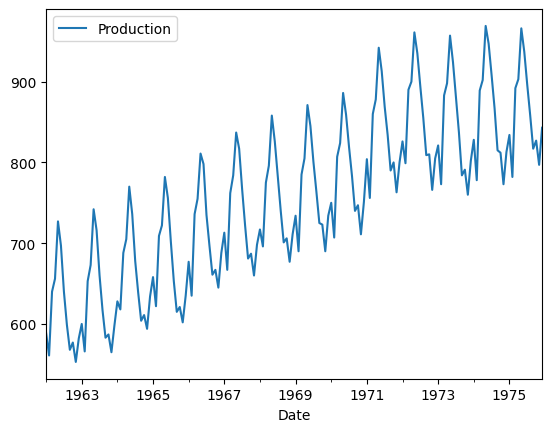

In [5]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [6]:
df.shape

(168, 1)

In [7]:
x_train = df[:150]
x_test = df[150:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator



In [13]:
n_input = 5
n_features = 1
generator = TimeseriesGenerator(x_train, x_train, length = n_input, batch_size=1)

In [15]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923]]]),
 array([[0.34615385]]))

In [16]:
x,y = generator[0]
print(f'Given the Array: \n{x.flatten()}')

Given the Array: 
[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923]


In [17]:
print(f'Predict this y: \n {y}')

Predict this y: 
 [[0.34615385]]


In [18]:
n_input = 12
generator = TimeseriesGenerator(x_train, x_train, length = n_input, batch_size=1)

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM

model = tf.keras.Sequential([
    LSTM(100, activation = 'relu', input_shape = (n_input, n_features)),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='mse')

In [23]:
model.fit(generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0844
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0093
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044
Epoch 9/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0049
Epoch 10/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033
Epoch 11/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041
Epoch 12/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029
Epoch 13/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043
Epoch 14/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084
Epoch 15/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0

In [24]:
train_batch = x_train[-12:].reshape((1, n_input, n_features))

In [25]:
model.predict(train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[0.88161445]], dtype=float32)

In [26]:
import numpy as np

test_predictions = []

first_eval_batch = x_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(x_test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [27]:
test_predictions

[array([0.88161445], dtype=float32),
 array([0.7661339], dtype=float32),
 array([0.6506363], dtype=float32),
 array([0.62553763], dtype=float32),
 array([0.58248097], dtype=float32),
 array([0.6371782], dtype=float32),
 array([0.6888674], dtype=float32),
 array([0.65560144], dtype=float32),
 array([0.85576844], dtype=float32),
 array([0.9244066], dtype=float32),
 array([1.0342662], dtype=float32),
 array([1.0151484], dtype=float32),
 array([0.95637536], dtype=float32),
 array([0.8497449], dtype=float32),
 array([0.73136985], dtype=float32),
 array([0.68172777], dtype=float32),
 array([0.64624816], dtype=float32),
 array([0.6754102], dtype=float32)]

In [28]:
x_predictions = scaler.inverse_transform(test_predictions)

In [36]:
x_test['Predictions'] = x_predictions

<ipython-input-36-73aa5c374ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Predictions'] = x_predictions


In [37]:
x_test.head()

,Production,Predictions
Date,,
1974-07-01,908,919.751610
1974-08-01,867,871.711704
1974-09-01,815,823.664707
1974-10-01,812,813.223656
1974-11-01,773,795.312082


<Axes: xlabel='Date'>

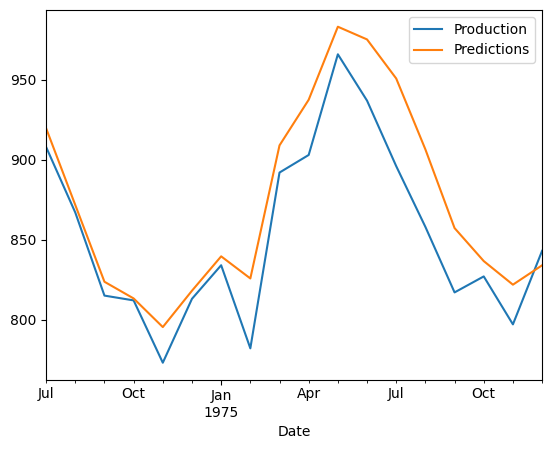

In [38]:
x_test.plot()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test['Production'], x_test['Predictions']))
print(rmse)

27.610876363272954
